<a href="https://colab.research.google.com/github/jayasreenarayan/NYC-Taxi-Demand-Forecasting-Price-Prediction/blob/main/Operation_Analytics_EDA_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('green_taxi_data.csv')

In [ ]:
data.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,duration,time_only,duration_minutes,pickup_hour,time_desc
0,2,2024-05-01 00:07:08,2024-05-01 00:15:03,N,1.0,65,49,1.0,1.24,9.3,...,1.0,13.80,1.0,1.0,0.0,0 days 00:07:55,00:07:55,7.916667,0,Late Night
1,2,2024-05-01 00:30:48,2024-05-01 00:35:49,N,1.0,7,179,1.0,0.94,7.2,...,1.0,11.64,1.0,1.0,0.0,0 days 00:05:01,00:05:01,5.016667,0,Late Night
2,2,2024-05-01 00:34:13,2024-05-01 00:38:07,N,1.0,74,42,1.0,0.84,6.5,...,1.0,9.00,2.0,1.0,0.0,0 days 00:03:54,00:03:54,3.900000,0,Late Night
3,2,2024-05-01 00:58:01,2024-05-01 01:14:41,N,1.0,75,235,1.0,6.07,25.4,...,1.0,32.90,1.0,1.0,0.0,0 days 00:16:40,00:16:40,16.666667,0,Late Night
4,2,2024-05-01 00:11:45,2024-05-01 00:20:38,N,1.0,256,49,2.0,2.06,12.1,...,1.0,17.52,1.0,1.0,0.0,0 days 00:08:53,00:08:53,8.883333,0,Late Night


            VendorID     RatecodeID   PULocationID   DOLocationID  \
count  198449.000000  198449.000000  198449.000000  198449.000000   
mean        1.907538       1.174745      94.851388     142.271198   
std         0.289678       0.809223      55.481361      76.512689   
min         1.000000       1.000000       1.000000       1.000000   
25%         2.000000       1.000000      74.000000      75.000000   
50%         2.000000       1.000000      75.000000     140.000000   
75%         2.000000       1.000000      97.000000     229.000000   
max         2.000000       6.000000     265.000000     265.000000   

       passenger_count  trip_distance    fare_amount          extra  \
count    198449.000000  198449.000000  198449.000000  198449.000000   
mean          1.344809       3.013676      18.558869       1.007792   
std           0.994712       3.217694      17.561466       1.439977   
min           1.000000       0.010000       0.010000       0.000000   
25%           1.000000 

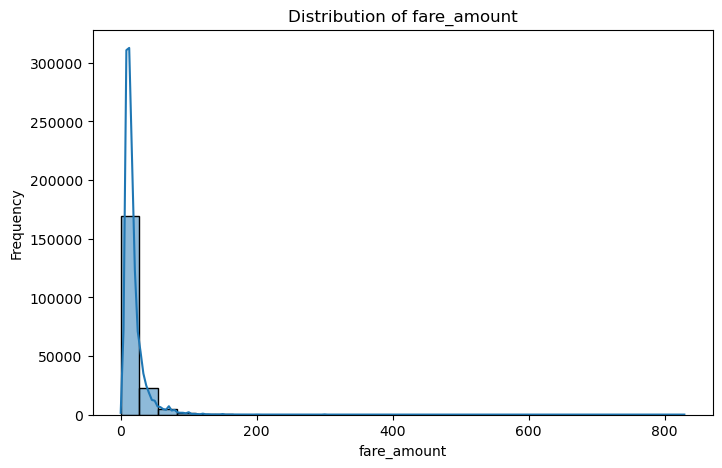

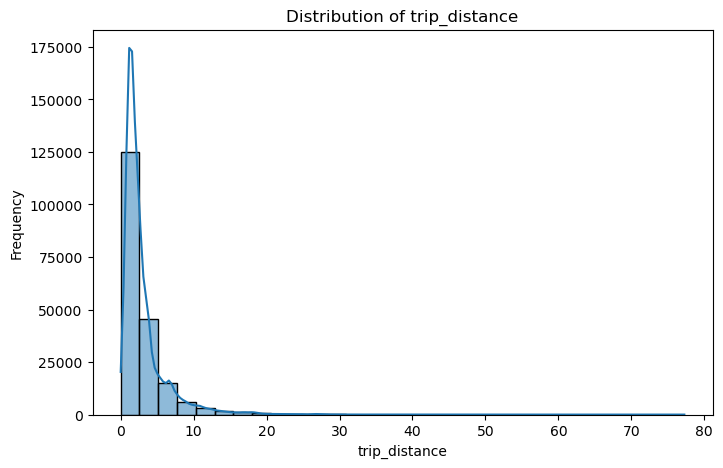

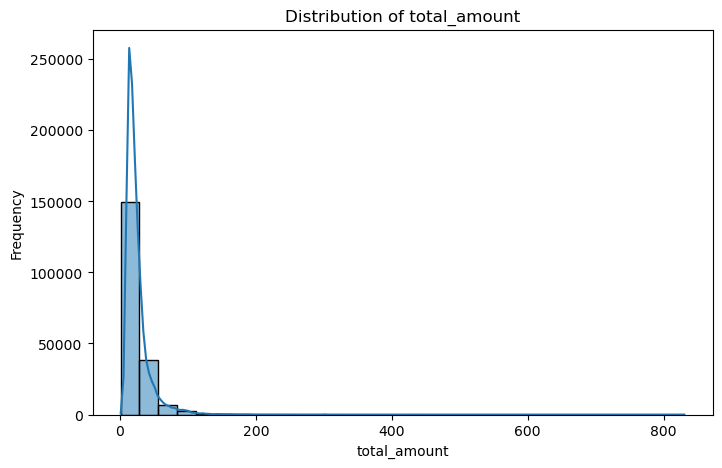

In [ ]:
# Summary of the dataset
print(data.describe())

# Key variable distributions
for col in ['fare_amount', 'trip_distance', 'total_amount']:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Key Takeaways from the Descriptive Analysis
## Trip Characteristics:

Most trips are short, with a median distance of ~2 miles and a median duration of ~12 minutes.
Extreme outliers exist, with some trips exceeding 77 miles or lasting nearly 24 hours, which may indicate data anomalies.
Fare Insights:

The median fare is $14.20, with most trips costing between $10 and $20.50.
The average total fare is slightly higher at $24.75, influenced by a few very high fares (up to $829).
Additional charges like congestion surcharge and MTA tax are common but generally small, while tips vary widely, with a median of $2.16.
Passenger and Payment Patterns:

Most trips have 1 passenger, with few instances of group trips (up to 6 passengers).
Credit cards are the most common payment method, followed by cash or disputes.
Geographical Distribution:

Trips are concentrated in specific zones (median pickup and drop-off locations around Zone IDs 74-97), reflecting high-demand areas like Manhattan.
Temporal Trends:

Trips peak in the afternoon (mean pickup hour: 2:11 PM) but are well-distributed across the day.
Weekday vs. weekend effects and rush-hour trends may influence pricing and demand.
Outliers and Data Quality Issues:

Extreme values in fare amounts, trip distances, and durations suggest the presence of outliers or errors that require cleaning.
A significant number of trips have zero additional charges or tips, which may reflect cash payments or specific trip conditions.

In [ ]:

print(data.isnull().sum())
# No Missing values identified

VendorID                 0
lpep_pickup_datetime     0
lpep_dropoff_datetime    0
store_and_fwd_flag       0
RatecodeID               0
PULocationID             0
DOLocationID             0
passenger_count          0
trip_distance            0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
payment_type             0
trip_type                0
congestion_surcharge     0
duration                 0
time_only                0
duration_minutes         0
pickup_hour              0
time_desc                0
dtype: int64


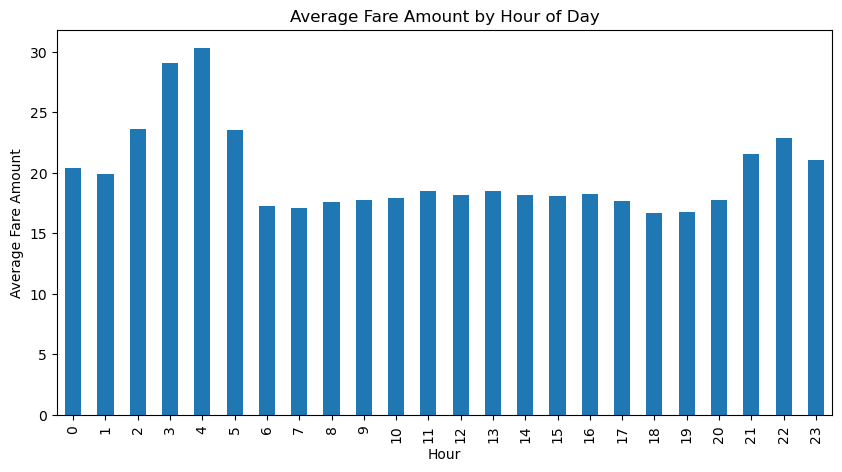

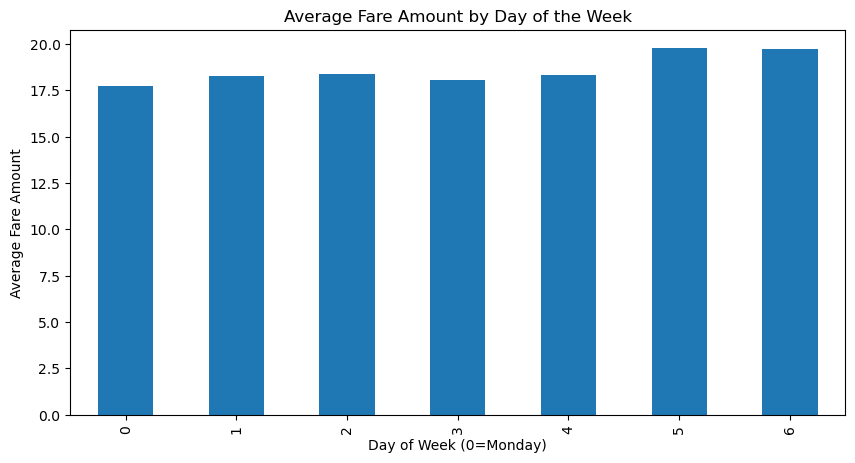

In [ ]:
# Convert pickup datetime to datetime object
data['lpep_pickup_datetime'] = pd.to_datetime(data['lpep_pickup_datetime'])

# Extract hour and day of the week
data['hour'] = data['lpep_pickup_datetime'].dt.hour
data['day_of_week'] = data['lpep_pickup_datetime'].dt.dayofweek

# Group by hour and calculate mean fare
hourly_fares = data.groupby('hour')['fare_amount'].mean()

plt.figure(figsize=(10, 5))
hourly_fares.plot(kind='bar')
plt.title('Average Fare Amount by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Average Fare Amount')
plt.show()

# Group by day of the week and calculate mean fare
day_fares = data.groupby('day_of_week')['fare_amount'].mean()

plt.figure(figsize=(10, 5))
day_fares.plot(kind='bar')
plt.title('Average Fare Amount by Day of the Week')
plt.xlabel('Day of Week (0=Monday)')
plt.ylabel('Average Fare Amount')
plt.show()

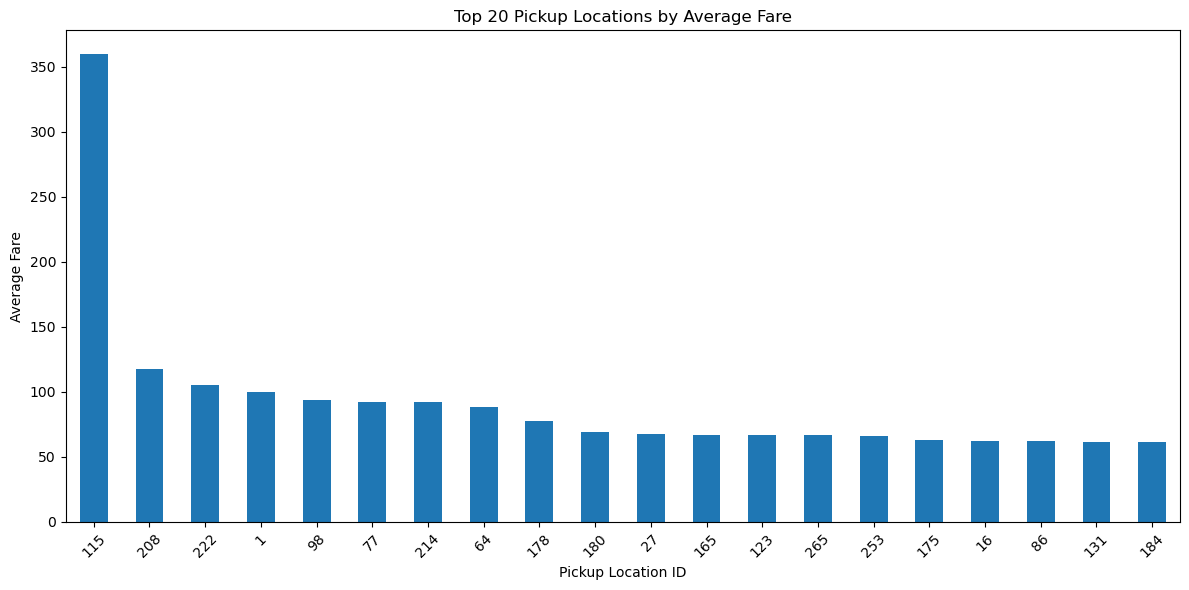

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Group by Pickup Location ID and calculate average fare
pickup_fares = data.groupby('PULocationID')['fare_amount'].mean().sort_values(ascending=False)

# Select top 20 locations with the highest fares
top_pickup_fares = pickup_fares.head(20)

# Plot
plt.figure(figsize=(12, 6))  # Increase figure size for better readability
top_pickup_fares.plot(kind='bar')
plt.title('Top 20 Pickup Locations by Average Fare')
plt.xlabel('Pickup Location ID')
plt.ylabel('Average Fare')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

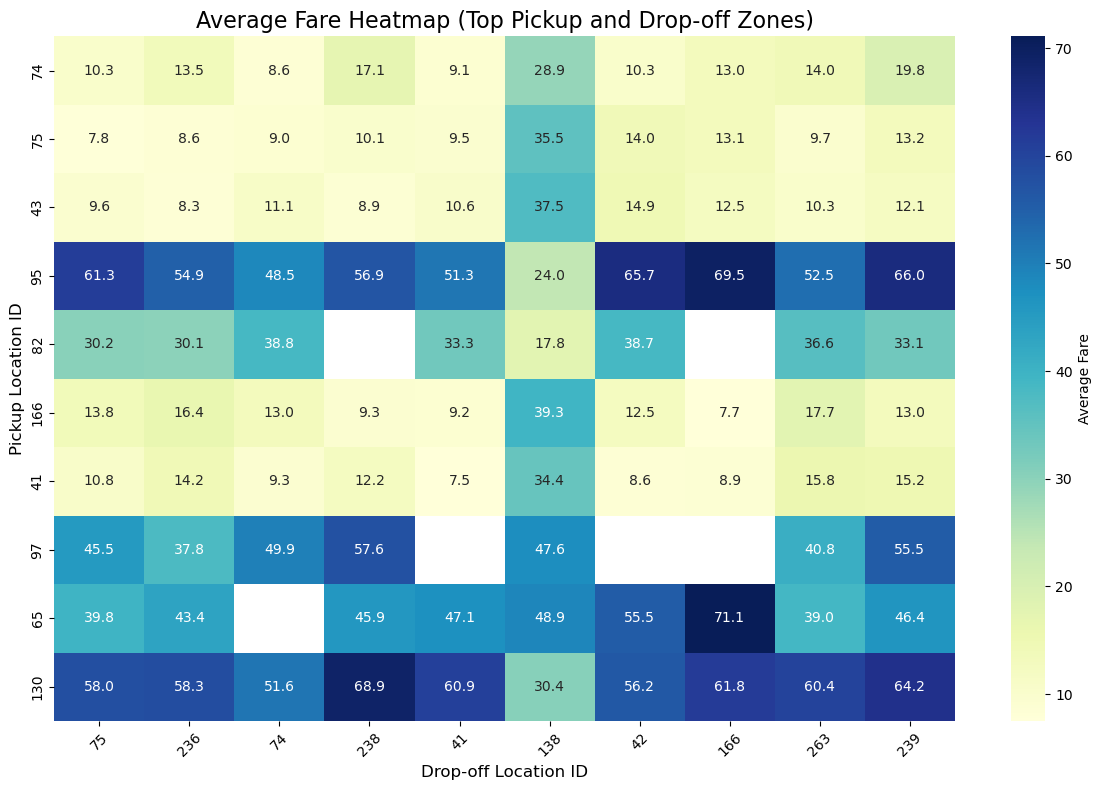

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Group the data by pickup and drop-off locations and calculate average fare
fare_heatmap_data = data.groupby(['PULocationID', 'DOLocationID'])['fare_amount'].mean().unstack()

# Select top 10 pickup and drop-off zones based on frequency (optional: for better visualization)
top_pickups = data['PULocationID'].value_counts().head(10).index
top_dropoffs = data['DOLocationID'].value_counts().head(10).index
fare_heatmap_data = fare_heatmap_data.loc[top_pickups, top_dropoffs]

# Plot the heatmap
plt.figure(figsize=(12, 8))  # Increase the figure size
sns.heatmap(fare_heatmap_data, annot=True, fmt=".1f", cmap="YlGnBu", cbar_kws={'label': 'Average Fare'})
plt.title('Average Fare Heatmap (Top Pickup and Drop-off Zones)', fontsize=16)
plt.xlabel('Drop-off Location ID', fontsize=12)
plt.ylabel('Pickup Location ID', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

### Temporal Patterns
Peak Fares: 2 AM - 4 AM due to limited availability and nightlife demand.
Steady Fares: Daytime (6 AM - 8 PM) with shorter, routine trips.
Evening Increase: 8 PM - 10 PM due to higher evening travel demand.
### Geospatial Insights
Airports (Zones 95 & 130): Highest fares due to fixed airport rates, long distances, tolls, and surcharges.
Manhattan Zones (41 & 43): High demand, congestion charges, and tourist/business activity.
Cross-Borough Zones (97 & 166): Long trips and toll crossings lead to higher fares.
Outliers: Rare high-value trips skew some averages.
### Fare vs. Distance
Positive correlation with diminishing returns for very long trips. Outliers indicate possible anomalies or premium charges.
### Data Characteristics
Median trip distance: ~2 miles; median duration: ~12 minutes.
Average fare: ~$18.56; peaks driven by airport and long-distance trips.

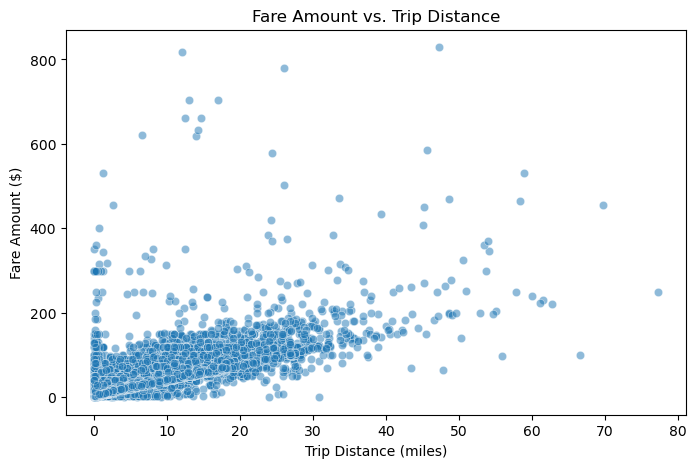

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x='trip_distance', y='fare_amount', alpha=0.5)
plt.title('Fare Amount vs. Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.show()

In [ ]:
# Ensure datetime conversion
data['lpep_pickup_datetime'] = pd.to_datetime(data['lpep_pickup_datetime'])
data['lpep_dropoff_datetime'] = pd.to_datetime(data['lpep_dropoff_datetime'])

# Calculate trip duration in minutes
data['trip_duration'] = (data['lpep_dropoff_datetime'] - data['lpep_pickup_datetime']).dt.total_seconds() / 60

In [ ]:
print(data[['lpep_pickup_datetime', 'lpep_dropoff_datetime', 'trip_duration']].head())

  lpep_pickup_datetime lpep_dropoff_datetime  trip_duration
0  2024-05-01 00:07:08   2024-05-01 00:15:03       7.916667
1  2024-05-01 00:30:48   2024-05-01 00:35:49       5.016667
2  2024-05-01 00:34:13   2024-05-01 00:38:07       3.900000
3  2024-05-01 00:58:01   2024-05-01 01:14:41      16.666667
4  2024-05-01 00:11:45   2024-05-01 00:20:38       8.883333


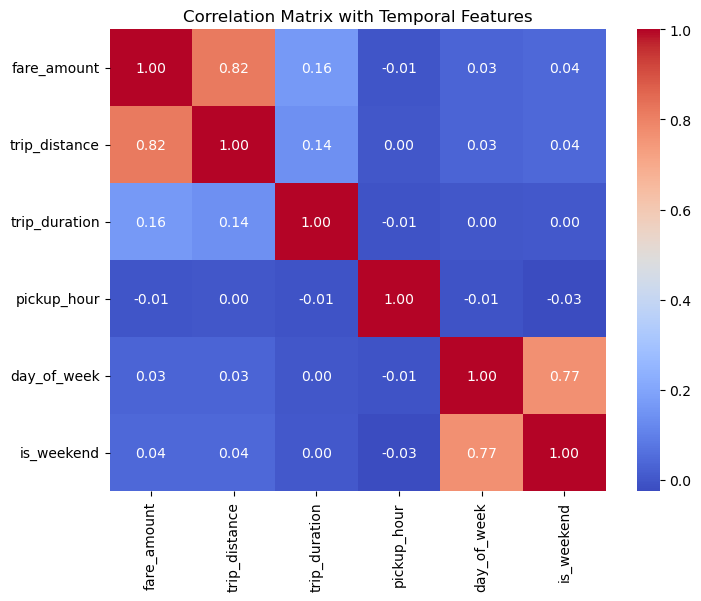

In [ ]:
# Compute correlation matrix for relevant numerical variables
correlation_matrix = data[['fare_amount', 'trip_distance', 'trip_duration']].corr()

# Plot correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

data['pickup_hour'] = data['lpep_pickup_datetime'].dt.hour
data['day_of_week'] = data['lpep_pickup_datetime'].dt.dayofweek
data['is_weekend'] = data['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

# Recalculate correlation matrix
temporal_corr = data[['fare_amount', 'trip_distance', 'trip_duration', 'pickup_hour', 'day_of_week', 'is_weekend']].corr()

# Plot updated correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(temporal_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix with Temporal Features')
plt.show()

## Takeaways
### Primary Driver of Fare:

Trip distance is the strongest predictor of fare amount and should be emphasized in any fare prediction model.
Temporal Features:

Temporal features (e.g., pickup_hour, day_of_week, is_weekend) have minimal direct correlation with fare but may indirectly impact demand patterns.
Duration as a Secondary Factor:

While weakly correlated, trip duration may still provide value when combined with other features, particularly for time-based pricing scenarios.
Derived Features:

The weak correlations of pickup_hour and day_of_week with fare suggest exploring interactions (e.g., hour + zone combinations) for non-linear relationships.